In [1]:
import wikipedia as wk
import re
from IPython.core.display import clear_output

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
plt.style.use('ggplot')

In [3]:
sns.set(rc={'figure.figsize':(10.7,4.27)})

## Load dataframe

In [4]:
# raw_data
file = '04_clean_data_OCT_19.csv'
data_directory = os.path.join( '..','data','raw_data/{}'.format(file))

In [5]:
df= pd.read_csv(data_directory)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 6 columns):
name          284 non-null object
title         284 non-null object
summary       284 non-null object
year          284 non-null int64
transcript    284 non-null object
link          284 non-null object
dtypes: int64(1), object(5)
memory usage: 13.4+ KB


In [7]:
df.head()

,name,title,summary,year,transcript,link
0,Nikki Glaser,Bangin’,A NETFLIX ORIGINAL COMEDY SPECIAL Thank you! T...,2019,A NETFLIX ORIGINAL COMEDY SPECIAL\nThank you! ...,https://scrapsfromtheloft.com/2019/10/04/nikki...
1,Ryan Hamilton,Stand-Up The Tonight Show Starring Jimmy Fallon,Ryan Hamilton makes his Tonight Show debut wit...,2019,"Published on Sep 11, 2019\nThe Tonight Show St...",https://scrapsfromtheloft.com/2019/09/25/ryan-...
2,Mark Normandthe Tonight Show Starring Jimmy Fa...,Mark Normand Stand-Up The Tonight Show Starri...,Mark Normand is back on The Tonight Show with ...,2019,"Aired on September 19, 2019\nHey, hey. All rig...",https://scrapsfromtheloft.com/2019/09/21/mark-...
3,George Carlin,Dumb Americans,"Full transcript of George Carlin's ""Dumb Ameri...",2006,From Life Is Worth Losing\nRecorded on Novembe...,https://scrapsfromtheloft.com/2019/09/12/georg...
4,Bill Burr,Paper Tiger,"Only a few weeks after Dave Chappelle's ""Stick...",2019,"Recorded Live at the Royal Albert Hall, London...",https://scrapsfromtheloft.com/2019/09/10/bill-...


## Inspect Names

In [8]:
df[40:60]

,name,title,summary,year,transcript,link
40,Gabriel Iglesias,One Show Fits All,"In a new special from Houston, Gabriel ""Fluffy...",2019,[crowd chanting] Fluffy! Fluffy! [Fluffy shout...,https://scrapsfromtheloft.com/2019/01/30/gabri...
41,Sebastian Maniscalco,Stay Hungry,Sebastian's captivating storytelling keeps the...,2019,[instrumental music plays] ♪ All right ♪ [scre...,https://scrapsfromtheloft.com/2019/01/29/sebas...
42,John Leguizamo,Latin History For Morons ’S Road To Broadway,Latin History for Morons: John Leguizamo's Roa...,2018,There are people out there trying to rewrite o...,https://scrapsfromtheloft.com/2019/01/27/latin...
43,Sebastian Maniscalco,Aren’T You Embarrassed?,Sebastian Maniscalco returns home to Chicago t...,2014,"Good, good. It feels good to be home in Chicag...",https://scrapsfromtheloft.com/2019/01/24/sebas...
44,Sebastian Maniscalco,What’S Wrong With People?,"""What's Wrong with People?"" asks Sebastian Man...",2012,"Please welcome Sebastian Maniscalco.\nSo good,...",https://scrapsfromtheloft.com/2019/01/24/sebas...
45,Ellen Degeneres,Relatable,"In her first special since 2003, Ellen revisit...",2018,A NETFLIX ORIGINAL COMEDY SPECIAL\n[crowd chee...,https://scrapsfromtheloft.com/2018/12/22/ellen...
46,Pete Holmes,Dirty Clean,The stand-up special Pete Holmes: Dirty Clean ...,2018,(crowd murmurs) Announcer: Ladies and gentleme...,https://scrapsfromtheloft.com/2018/12/19/pete-...
47,Vir Das,Losing It,"The world's got a lot of problems, but Vir Das...",2018,I lost 80% of my mind. It’s very freeing. You ...,https://scrapsfromtheloft.com/2018/12/15/vir-d...
48,Volker Pispers,About Usa,"Last part of Volker Pispers' program ""Bis neul...",2004,Last part of Volker Pispers’ program “Bis neul...,https://scrapsfromtheloft.com/2018/11/27/volke...
49,Trevor Noah,Son Of Patricia,"Trevor Noah gets out from behind the ""Daily Sh...",2018,A NETFLIX ORIGINAL COMEDY SPECIAL [distant tra...,https://scrapsfromtheloft.com/2018/11/21/trevo...


In [9]:
# fix Jeff Foxworthylarry The Cable Guy	 to just Jeff Foxworthy
# fix name
df.loc[50, 'name'] = 'Jeff Foxworthy'

In [10]:
df[40:60]

,name,title,summary,year,transcript,link
40,Gabriel Iglesias,One Show Fits All,"In a new special from Houston, Gabriel ""Fluffy...",2019,[crowd chanting] Fluffy! Fluffy! [Fluffy shout...,https://scrapsfromtheloft.com/2019/01/30/gabri...
41,Sebastian Maniscalco,Stay Hungry,Sebastian's captivating storytelling keeps the...,2019,[instrumental music plays] ♪ All right ♪ [scre...,https://scrapsfromtheloft.com/2019/01/29/sebas...
42,John Leguizamo,Latin History For Morons ’S Road To Broadway,Latin History for Morons: John Leguizamo's Roa...,2018,There are people out there trying to rewrite o...,https://scrapsfromtheloft.com/2019/01/27/latin...
43,Sebastian Maniscalco,Aren’T You Embarrassed?,Sebastian Maniscalco returns home to Chicago t...,2014,"Good, good. It feels good to be home in Chicag...",https://scrapsfromtheloft.com/2019/01/24/sebas...
44,Sebastian Maniscalco,What’S Wrong With People?,"""What's Wrong with People?"" asks Sebastian Man...",2012,"Please welcome Sebastian Maniscalco.\nSo good,...",https://scrapsfromtheloft.com/2019/01/24/sebas...
45,Ellen Degeneres,Relatable,"In her first special since 2003, Ellen revisit...",2018,A NETFLIX ORIGINAL COMEDY SPECIAL\n[crowd chee...,https://scrapsfromtheloft.com/2018/12/22/ellen...
46,Pete Holmes,Dirty Clean,The stand-up special Pete Holmes: Dirty Clean ...,2018,(crowd murmurs) Announcer: Ladies and gentleme...,https://scrapsfromtheloft.com/2018/12/19/pete-...
47,Vir Das,Losing It,"The world's got a lot of problems, but Vir Das...",2018,I lost 80% of my mind. It’s very freeing. You ...,https://scrapsfromtheloft.com/2018/12/15/vir-d...
48,Volker Pispers,About Usa,"Last part of Volker Pispers' program ""Bis neul...",2004,Last part of Volker Pispers’ program “Bis neul...,https://scrapsfromtheloft.com/2018/11/27/volke...
49,Trevor Noah,Son Of Patricia,"Trevor Noah gets out from behind the ""Daily Sh...",2018,A NETFLIX ORIGINAL COMEDY SPECIAL [distant tra...,https://scrapsfromtheloft.com/2018/11/21/trevo...


## Get len of transcript

In [11]:
df['len_transcript'] = df.transcript.str.len()

In [12]:
df.len_transcript.describe()

count      284.000000
mean     44476.133803
std      17255.660658
min       2491.000000
25%      38265.000000
50%      46805.000000
75%      55752.750000
max      86391.000000
Name: len_transcript, dtype: float64

Text(0.5, 1.0, 'Length of Transcript by Word Count')

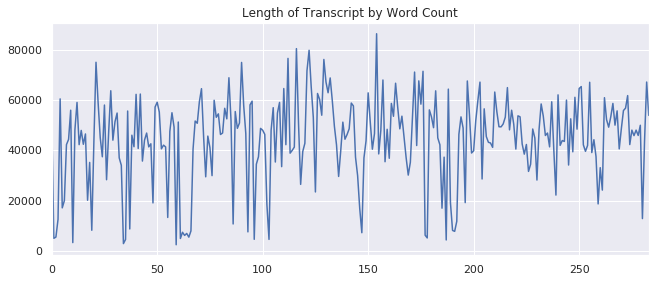

In [13]:
df.len_transcript.plot()
plt.title('Length of Transcript by Word Count')

Text(0.5, 1.0, 'length of Transcript Distribution')

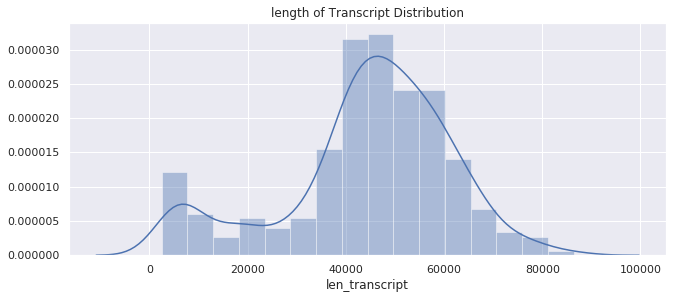

In [14]:
sns.distplot(df.len_transcript)
plt.title('length of Transcript Distribution')

## drop any transcripts < 20000
Lets only select transcripts that are 20K words or longer

In [15]:
large_transcripts = df.len_transcript> 20000

In [16]:
df = df[large_transcripts]

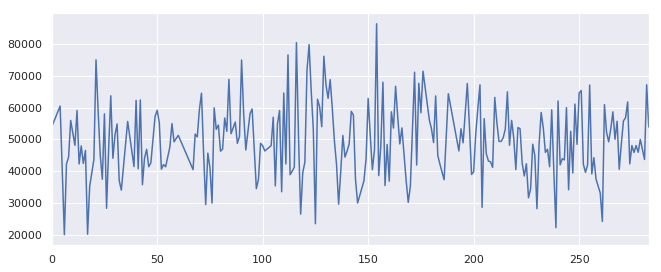

In [17]:
df.len_transcript.plot()

In [18]:
df.len_transcript.describe()

count      248.000000
mean     49547.592742
std      11544.399145
min      20019.000000
25%      41997.000000
50%      48588.000000
75%      57220.250000
max      86391.000000
Name: len_transcript, dtype: float64

Text(0.5, 1.0, 'length of Transcript Distribution')

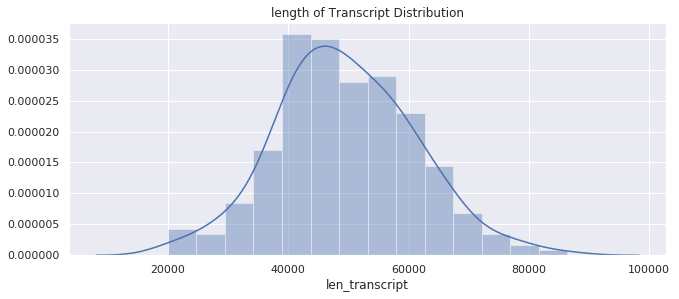

In [19]:
sns.distplot(df.len_transcript)
plt.title('length of Transcript Distribution')

In [20]:
df.head()

,name,title,summary,year,transcript,link,len_transcript
0,Nikki Glaser,Bangin’,A NETFLIX ORIGINAL COMEDY SPECIAL Thank you! T...,2019,A NETFLIX ORIGINAL COMEDY SPECIAL\nThank you! ...,https://scrapsfromtheloft.com/2019/10/04/nikki...,53937
4,Bill Burr,Paper Tiger,"Only a few weeks after Dave Chappelle's ""Stick...",2019,"Recorded Live at the Royal Albert Hall, London...",https://scrapsfromtheloft.com/2019/09/10/bill-...,60486
6,Amazon Rainforestclimate Changedeforestationha...,"Brazil, Corruption And The Amazon Rainforest |...",Hasan explains why Brazil's Trump-like preside...,0,"On this episode of Patriot Act, Hasan breaks d...",https://scrapsfromtheloft.com/2019/08/26/brazi...,20019
7,Dave Chappelle,Sticks & Stones,Legendary comedian Dave Chappelle is back with...,2019,Sticks & Stones is Dave Chappelle’s fifth Netf...,https://scrapsfromtheloft.com/2019/08/26/dave-...,42293
8,Emily Heller,Ice Thickeners,"Emily Heller compares Donald Trump to Air Bud,...",2019,"Emily Heller compares Donald Trump to Air Bud,...",https://scrapsfromtheloft.com/2019/08/25/emily...,44383


## Extract DOB from wikipedia

In [21]:
def get_bday_wiki_rx(data):
    '''call wikipedia API to extract DOB from summary'''
    pat = r'(\d{2}\s[A-z]+\s|[A-z]+\s\d{2},?\s)?\d{4}'
    pattern = re.compile(pat,re.IGNORECASE|re.VERBOSE)
    name = data['name']
    print('bday extraction: {}'.format(name))
    clear_output(wait = True)
    try:
        page = wk.page(name)
        result = pattern.search(page.content).group()
        return result
    except:
        print('Some error.')

## Extract Sex from wikipedia

In [22]:
def get_sex_wiki_rx(data):
    '''call wikipedia API to extact sex of person
    by searching how they are described'''
    pat = r'(He|She)'
    pattern = re.compile(pat,re.IGNORECASE|re.VERBOSE)
    name= data['name']
    print('sex extraction: {}'.format(name))
    clear_output(wait = True)
    try:
        page = wk.page(name)
        result = pattern.search(page.content).group()
        result = result.title()
        if result == 'She':
            return 'Female'
        elif result == 'He':
            return 'Male'
        else:
            return 'Unk'
    except:
        print('Some error')

## Apply functions

In [23]:
%%time
df['dob'] = df.apply(get_bday_wiki_rx,axis=1)

CPU times: user 12.2 s, sys: 3.19 s, total: 15.4 s
Wall time: 4min 28s


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 0 to 283
Data columns (total 8 columns):
name              248 non-null object
title             248 non-null object
summary           248 non-null object
year              248 non-null int64
transcript        248 non-null object
link              248 non-null object
len_transcript    248 non-null int64
dob               245 non-null object
dtypes: int64(2), object(6)
memory usage: 17.4+ KB


In [25]:
df.dob.value_counts(dropna=False)[:10]

May 12, 1937          16
August 24, 1973        9
September 12, 1967     7
1971                   7
14 February 1977       6
June 10, 1968          6
1970                   5
1965                   5
1979                   5
1981                   5
Name: dob, dtype: int64

In [26]:
df.head()

,name,title,summary,year,transcript,link,len_transcript,dob
0,Nikki Glaser,Bangin’,A NETFLIX ORIGINAL COMEDY SPECIAL Thank you! T...,2019,A NETFLIX ORIGINAL COMEDY SPECIAL\nThank you! ...,https://scrapsfromtheloft.com/2019/10/04/nikki...,53937,1984
4,Bill Burr,Paper Tiger,"Only a few weeks after Dave Chappelle's ""Stick...",2019,"Recorded Live at the Royal Albert Hall, London...",https://scrapsfromtheloft.com/2019/09/10/bill-...,60486,"June 10, 1968"
6,Amazon Rainforestclimate Changedeforestationha...,"Brazil, Corruption And The Amazon Rainforest |...",Hasan explains why Brazil's Trump-like preside...,0,"On this episode of Patriot Act, Hasan breaks d...",https://scrapsfromtheloft.com/2019/08/26/brazi...,20019,None
7,Dave Chappelle,Sticks & Stones,Legendary comedian Dave Chappelle is back with...,2019,Sticks & Stones is Dave Chappelle’s fifth Netf...,https://scrapsfromtheloft.com/2019/08/26/dave-...,42293,"August 24, 1973"
8,Emily Heller,Ice Thickeners,"Emily Heller compares Donald Trump to Air Bud,...",2019,"Emily Heller compares Donald Trump to Air Bud,...",https://scrapsfromtheloft.com/2019/08/25/emily...,44383,1985


## Check null values

In [27]:
df.apply(lambda x: sum(x.isnull()))

name              0
title             0
summary           0
year              0
transcript        0
link              0
len_transcript    0
dob               3
dtype: int64

In [28]:
df[df.isnull().any(axis=1)]

,name,title,summary,year,transcript,link,len_transcript,dob
6,Amazon Rainforestclimate Changedeforestationha...,"Brazil, Corruption And The Amazon Rainforest |...",Hasan explains why Brazil's Trump-like preside...,0,"On this episode of Patriot Act, Hasan breaks d...",https://scrapsfromtheloft.com/2019/08/26/brazi...,20019,None
83,Deray Davis,How To Act Black,Dynamic comic DeRay Davis hits the stage like ...,2017,"[male announcer] ATL, get ready for the man of...",https://scrapsfromtheloft.com/2018/07/18/deray...,52546,None
186,Erik Griffin,The Ugly Truth,Erik Griffin’s performance at The Laugh Factor...,2017,"Ladies and gentlemen, live from Laugh Factory ...",https://scrapsfromtheloft.com/2017/10/08/erik-...,37321,None


In [49]:
# Deray Davis
df.loc[83, 'dob'] = 'February 26, 1968'
# Erik Griffin
df.loc[186, 'dob'] = 'March 26, 1976'


In [52]:
df.apply(lambda x: sum(x.isnull()))

name              0
title             0
summary           0
year              0
transcript        0
link              0
len_transcript    0
dob               0
sex               0
dtype: int64

## Get sex value

In [31]:
%%time
df['sex'] = df.apply(get_sex_wiki_rx,axis=1)

CPU times: user 11.2 s, sys: 2.66 s, total: 13.9 s
Wall time: 3min 24s


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 0 to 283
Data columns (total 9 columns):
name              248 non-null object
title             248 non-null object
summary           248 non-null object
year              248 non-null int64
transcript        248 non-null object
link              248 non-null object
len_transcript    248 non-null int64
dob               246 non-null object
sex               247 non-null object
dtypes: int64(2), object(7)
memory usage: 29.4+ KB


In [53]:
df.sex.value_counts(dropna=False)

Male      225
Female     22
Name: sex, dtype: int64

In [42]:
df.drop([6],inplace=True)

## Check null values

In [54]:
df.apply(lambda x: sum(x.isnull()))

name              0
title             0
summary           0
year              0
transcript        0
link              0
len_transcript    0
dob               0
sex               0
dtype: int64

In [55]:
df[df.isnull().any(axis=1)]

,name,title,summary,year,transcript,link,len_transcript,dob,sex


### Fix dob


In [56]:
df[df.isnull().any(axis=1)]

,name,title,summary,year,transcript,link,len_transcript,dob,sex


In [57]:
df.head()

,name,title,summary,year,transcript,link,len_transcript,dob,sex
0,Nikki Glaser,Bangin’,A NETFLIX ORIGINAL COMEDY SPECIAL Thank you! T...,2019,A NETFLIX ORIGINAL COMEDY SPECIAL\nThank you! ...,https://scrapsfromtheloft.com/2019/10/04/nikki...,53937,1984-01-01 00:00:00,Female
4,Bill Burr,Paper Tiger,"Only a few weeks after Dave Chappelle's ""Stick...",2019,"Recorded Live at the Royal Albert Hall, London...",https://scrapsfromtheloft.com/2019/09/10/bill-...,60486,1968-06-10 00:00:00,Male
7,Dave Chappelle,Sticks & Stones,Legendary comedian Dave Chappelle is back with...,2019,Sticks & Stones is Dave Chappelle’s fifth Netf...,https://scrapsfromtheloft.com/2019/08/26/dave-...,42293,1973-08-24 00:00:00,Male
8,Emily Heller,Ice Thickeners,"Emily Heller compares Donald Trump to Air Bud,...",2019,"Emily Heller compares Donald Trump to Air Bud,...",https://scrapsfromtheloft.com/2019/08/25/emily...,44383,1985-01-01 00:00:00,Male
9,David Cross,Oh Come On,Transcript of David Cross' latest stand-up sho...,2019,This is the full transcript of David Cross’ la...,https://scrapsfromtheloft.com/2019/08/13/david...,55980,1964-01-01 00:00:00,Male


In [58]:
# change to datetime
df.dob = pd.to_datetime(df.dob)

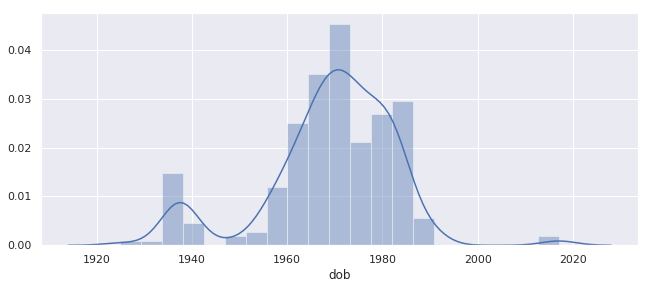

In [59]:
sns.distplot(df.dob.dt.year)

## Check who was born after 1990's

In [60]:
yr_filter = df.dob.dt.year> 1990

In [61]:
df[yr_filter]

,name,title,summary,year,transcript,link,len_transcript,dob,sex
47,Vir Das,Losing It,"The world's got a lot of problems, but Vir Das...",2018,I lost 80% of my mind. It’s very freeing. You ...,https://scrapsfromtheloft.com/2018/12/15/vir-d...,42632,2017-01-01,Male
106,Adel Karam,Live From Beirut,Adel Karam goes back to his hometown to appear...,2018,A NETFLIX COMEDY SPECIAL\nRecorded at the Casi...,https://scrapsfromtheloft.com/2018/03/12/adel-...,35384,2017-01-01,Male


## Fix it

In [62]:
# Vir Das	
# May 31, 1979
df.loc[47, 'dob'] = 'May 31, 1979'

# Adel Karam
# August 20, 1972
df.loc[106, 'dob'] = 'August 20, 1972'

In [63]:
df[yr_filter]

,name,title,summary,year,transcript,link,len_transcript,dob,sex
47,Vir Das,Losing It,"The world's got a lot of problems, but Vir Das...",2018,I lost 80% of my mind. It’s very freeing. You ...,https://scrapsfromtheloft.com/2018/12/15/vir-d...,42632,"May 31, 1979",Male
106,Adel Karam,Live From Beirut,Adel Karam goes back to his hometown to appear...,2018,A NETFLIX COMEDY SPECIAL\nRecorded at the Casi...,https://scrapsfromtheloft.com/2018/03/12/adel-...,35384,"August 20, 1972",Male


In [64]:
# change dob againt to datetime
df.dob = pd.to_datetime(df.dob)

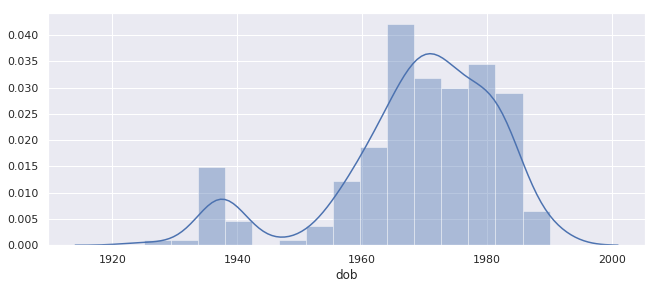

In [65]:
sns.distplot(df.dob.dt.year)

## Find age when special was recorded

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 283
Data columns (total 9 columns):
name              247 non-null object
title             247 non-null object
summary           247 non-null object
year              247 non-null int64
transcript        247 non-null object
link              247 non-null object
len_transcript    247 non-null int64
dob               247 non-null datetime64[ns]
sex               247 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 29.3+ KB


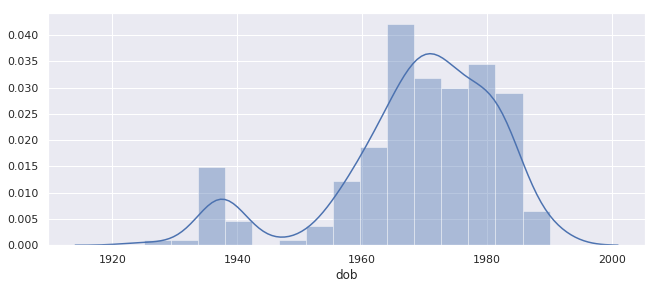

In [67]:
sns.distplot(df.dob.dt.year)

In [68]:
df['age_when_recorded'] = df.year - df.dob.dt.year

In [69]:
df.head()

,name,title,summary,year,transcript,link,len_transcript,dob,sex,age_when_recorded
0,Nikki Glaser,Bangin’,A NETFLIX ORIGINAL COMEDY SPECIAL Thank you! T...,2019,A NETFLIX ORIGINAL COMEDY SPECIAL\nThank you! ...,https://scrapsfromtheloft.com/2019/10/04/nikki...,53937,1984-01-01,Female,35
4,Bill Burr,Paper Tiger,"Only a few weeks after Dave Chappelle's ""Stick...",2019,"Recorded Live at the Royal Albert Hall, London...",https://scrapsfromtheloft.com/2019/09/10/bill-...,60486,1968-06-10,Male,51
7,Dave Chappelle,Sticks & Stones,Legendary comedian Dave Chappelle is back with...,2019,Sticks & Stones is Dave Chappelle’s fifth Netf...,https://scrapsfromtheloft.com/2019/08/26/dave-...,42293,1973-08-24,Male,46
8,Emily Heller,Ice Thickeners,"Emily Heller compares Donald Trump to Air Bud,...",2019,"Emily Heller compares Donald Trump to Air Bud,...",https://scrapsfromtheloft.com/2019/08/25/emily...,44383,1985-01-01,Male,34
9,David Cross,Oh Come On,Transcript of David Cross' latest stand-up sho...,2019,This is the full transcript of David Cross’ la...,https://scrapsfromtheloft.com/2019/08/13/david...,55980,1964-01-01,Male,55


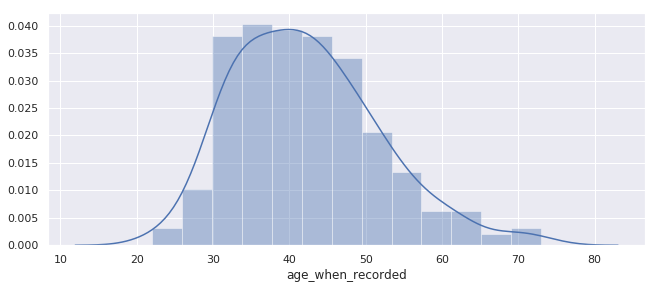

In [70]:
sns.distplot(df.age_when_recorded)

In [71]:
df.head()

,name,title,summary,year,transcript,link,len_transcript,dob,sex,age_when_recorded
0,Nikki Glaser,Bangin’,A NETFLIX ORIGINAL COMEDY SPECIAL Thank you! T...,2019,A NETFLIX ORIGINAL COMEDY SPECIAL\nThank you! ...,https://scrapsfromtheloft.com/2019/10/04/nikki...,53937,1984-01-01,Female,35
4,Bill Burr,Paper Tiger,"Only a few weeks after Dave Chappelle's ""Stick...",2019,"Recorded Live at the Royal Albert Hall, London...",https://scrapsfromtheloft.com/2019/09/10/bill-...,60486,1968-06-10,Male,51
7,Dave Chappelle,Sticks & Stones,Legendary comedian Dave Chappelle is back with...,2019,Sticks & Stones is Dave Chappelle’s fifth Netf...,https://scrapsfromtheloft.com/2019/08/26/dave-...,42293,1973-08-24,Male,46
8,Emily Heller,Ice Thickeners,"Emily Heller compares Donald Trump to Air Bud,...",2019,"Emily Heller compares Donald Trump to Air Bud,...",https://scrapsfromtheloft.com/2019/08/25/emily...,44383,1985-01-01,Male,34
9,David Cross,Oh Come On,Transcript of David Cross' latest stand-up sho...,2019,This is the full transcript of David Cross’ la...,https://scrapsfromtheloft.com/2019/08/13/david...,55980,1964-01-01,Male,55


## Save

In [72]:
# raw_data
file = '05_clean_data_OCT_19.csv'
data_directory = os.path.join( '..','data','raw_data/{}'.format(file))

In [73]:
df.to_csv(data_directory,index=False)